In [2]:


##################### Python 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import numpy as np
import os
import datetime
import dcor
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
import os
os.chdir('/Users/sss/Desktop/Data')
os.getcwd()
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width: 60% !important; }</style>"))
plt.rcParams['font.family'] = 'AppleGothic'
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'



In [3]:
df = pd.read_csv("chatper21_logistic.csv",encoding='euc-kr')

In [4]:
df

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3
...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6
31682,31682,4127300065073100,5011000264061200,지갑,7


In [5]:
df.columns

Index(['index', '송하인_격자공간고유번호', '수하인_격자공간고유번호', '물품_카테고리', '운송장_건수'], dtype='object')

In [13]:
df['송하인_격자공간고유번호'].value_counts()

송하인_격자공간고유번호
5011000078068400    3882
5013000610049100    1790
5013000731055200    1235
5011000137030100    1137
5013000821028200     731
                    ... 
4511300030055300       1
4719000321023400       1
4423000423020300       1
4711300748080100       1
2811000139076100       1
Name: count, Length: 4229, dtype: int64

In [14]:
df['수하인_격자공간고유번호'].value_counts()

수하인_격자공간고유번호
5013000635005300    35
5011000543041100    33
5011000314069300    33
5011000544072300    30
5011000318044100    30
                    ..
5011000109040100     1
4183000550093100     1
4425000028078200     1
1147000011064300     1
5011000263065200     1
Name: count, Length: 26875, dtype: int64

In [15]:
df['물품_카테고리'].value_counts()

물품_카테고리
농산물              20321
문화컨텐츠             1091
음료                1034
수산                 860
가공식품               846
                 ...  
유아가구                 4
기타출산/육아              4
태블릿PC/노트북액세서리        4
선케어                  4
스포츠잡화                4
Name: count, Length: 100, dtype: int64

In [16]:
df['운송장_건수'].value_counts()

운송장_건수
3      17565
4       6065
5       2928
6       1368
7        761
       ...  
77         1
108        1
211        1
130        1
89         1
Name: count, Length: 100, dtype: int64

In [17]:
df

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3
...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6
31682,31682,4127300065073100,5011000264061200,지갑,7


In [22]:
df.groupby('물품_카테고리')['운송장_건수'].sum().sort_values(ascending=False).head(20)

물품_카테고리
농산물          87829
음료            5890
가공식품          5766
문화컨텐츠         5429
수산            4880
기타식품          4250
건강식품          3413
축산            3385
기타패션의류        3042
음반            2357
과자            1866
냉동/간편조리식품     1787
주방용품          1776
생활용품          1599
건강용품          1554
기타디지털/가전      1505
반려동물          1388
문구/사무용품       1280
기타화장품/미용      1111
상의            1090
Name: 운송장_건수, dtype: int64

In [6]:
df.columns = ['index', 'start', 'end', 'prod', 'cnt']

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [8]:
df['cnt'].describe()

count    31684.000000
mean         4.879308
std          6.756473
min          3.000000
25%          3.000000
50%          3.000000
75%          5.000000
max        413.000000
Name: cnt, dtype: float64

In [9]:
iqr = df['cnt'].describe()[6] - df['cnt'].describe()[4]
iqr


2.0

In [10]:
df_new = df[(df['cnt'] > (df['cnt'].describe()[4]\
- iqr*1.5))&(df['cnt'] < (df['cnt'].describe()[6] + iqr*1.5))]

In [11]:
df_new['cnt'].describe()

count    28687.000000
mean         3.664726
std          1.015623
min          3.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: cnt, dtype: float64

In [12]:
df.isnull().sum()

index    0
start    0
end      0
prod     0
cnt      0
dtype: int64

In [13]:
X = df.drop(['index','cnt' ], axis=1)
Y = df['cnt']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)


In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22178, 3)
(9506, 3)
(22178,)
(9506,)


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
x_train

,start,end,prod
12351,5013000610049100,1165000014081200,농산물
24879,5011000137030100,4613000310042100,농산물
4145,5013000735079200,4833000032061100,농산물
7617,5013000043045200,4161000330057200,농산물
16609,5011000427089100,2653000021086300,음료
...,...,...,...
26249,5011000316024300,4511300098042300,수산
20631,5011000078068400,1129000009088400,농산물
1114,5013000905088200,4150000073089200,농산물
27718,5013000624091200,2771000320033400,농산물


In [17]:
df

,index,start,end,prod,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3
...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6
31682,31682,4127300065073100,5011000264061200,지갑,7


In [18]:
df

,index,start,end,prod,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3
...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6
31682,31682,4127300065073100,5011000264061200,지갑,7


In [19]:
df

,index,start,end,prod,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3
...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6
31682,31682,4127300065073100,5011000264061200,지갑,7


In [24]:
df

,index,start,end,prod,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3
...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6
31682,31682,4127300065073100,5011000264061200,지갑,7


In [27]:
from sklearn.preprocessing import LabelEncoder



X = df.drop(['index', 'cnt'], axis=1)
Y = df['cnt']

X['prod'] = le.fit_transform(X['prod'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)



In [28]:
x_train, x_test, y_train, y_test

(                  start               end  prod
 437    4136000216029100  5011000768053100    36
 21802  5013000459099100  1138000016067400    27
 1380   4141000031030100  5011000374055400    57
 3819   5011000137030100  4825000286062200    27
 23820  5013000777063100  4146500013012200    27
 ...                 ...               ...   ...
 1685   5011000437099200  4279000585031300    27
 18923  5013000910072100  1168000016035200    27
 8612   5011000141080300  1121500011096400    11
 8508   4681000486026200  5011000258035100    51
 13652  5013000610049100  1138000026004100    27
 
 [25347 rows x 3 columns],
                   start               end  prod
 11780  5011000137030100  2629000015054200    27
 1231   5011000595017300  4157000189045400    67
 28633  1153000017005200  5011000265053300    29
 13545  5011000312034400  3014000012097100    27
 8523   4684000416070200  5011000168061400     5
 ...                 ...               ...   ...
 18135  5013000930047300  44150004830234

In [29]:
rfr = RandomForestRegressor(n_estimators=200, max_depth=6)
rfr.fit(x_train, y_train)

y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.23681747157012834
0.1551453146979318


In [30]:
def model_check(other):
    
    other.fit(x_train, y_train)

    y_pred_train = other.predict(x_train)
    y_pred_test = other.predict(x_test)


    print(r2_score(y_train, y_pred_train))
    print(r2_score(y_test, y_pred_test))

    print('mae')
    print(mean_absolute_error(y_train, y_pred_train))
    print(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    print('rmse')
    print(mean_absolute_error(y_test, y_pred_test))
    print(np.sqrt(mean_squared_error(y_test, y_pred_test)))

    print('Result Data Frame')
    result = pd.DataFrame({'real': y_test, 'predicted' : y_pred_test})
    result['diff'] = result['real'] - result['predicted']
    print(result)

    sns.scatterplot(data=result, x='real', y='predicted')
    plt.plot([result['real'].min(),result['real'].max()], [result['real'].min(),result['real'].max()])
    plt.axhline(result['real'].mean(), color='red')
    plt.xlim(0, 60)
    plt.ylim(0, 60)
    plt.show()


    top20 = pd.Series(other.feature_importances_, x_train.columns)
    top20 = top20.sort_values(ascending=False)
    sns.barplot(x=top20, y=top20.index)
    plt.show()

In [31]:
import xgboost as xgb
import lightgbm as lgb



0.23514388768694072
0.1537037046614873
mae
2.2558853393792684
5.9590109008312275
rmse
2.3440255854937213
5.9995868593647765
Result Data Frame
       real  predicted      diff
11780     3   3.788357 -0.788357
1231      4   4.518567 -0.518567
28633     3   4.446887 -1.446887
13545     3   3.812201 -0.812201
8523     10   9.871159  0.128841
...     ...        ...       ...
18135     3   4.776372 -1.776372
283       3   4.286284 -1.286284
14668     7   3.813531  3.186469
22168     3   3.788152 -0.788152
9292      3   5.671858 -2.671858

[6337 rows x 3 columns]


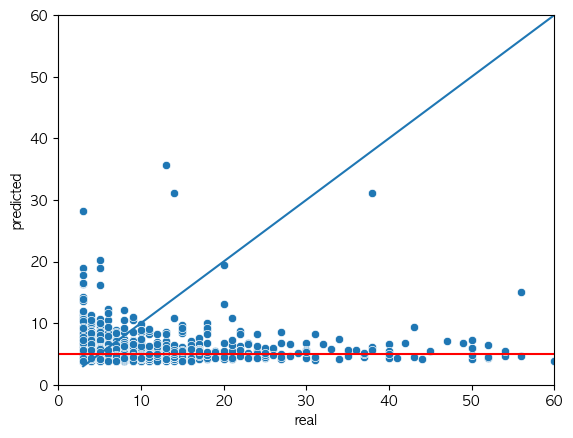

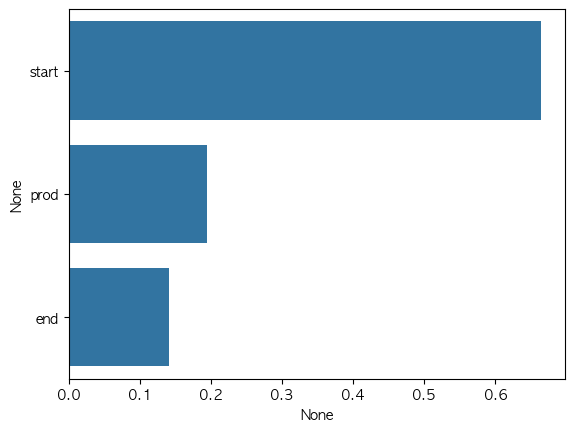

In [32]:
rfr = RandomForestRegressor(n_estimators=300, max_depth=6)
model_check(rfr)


0.39621581642348724
0.05915402319810947
mae
2.032322498838304
5.294502712978637
rmse
2.431339985398402
6.3258573094009565
Result Data Frame
       real  predicted      diff
11780     3   3.686123 -0.686123
1231      4   3.057674  0.942326
28633     3   3.133036 -0.133036
13545     3   3.987755 -0.987755
8523     10   7.906005  2.093995
...     ...        ...       ...
18135     3   4.206767 -1.206767
283       3   4.527153 -1.527153
14668     7   3.833296  3.166704
22168     3   3.538014 -0.538014
9292      3   6.869913 -3.869913

[6337 rows x 3 columns]


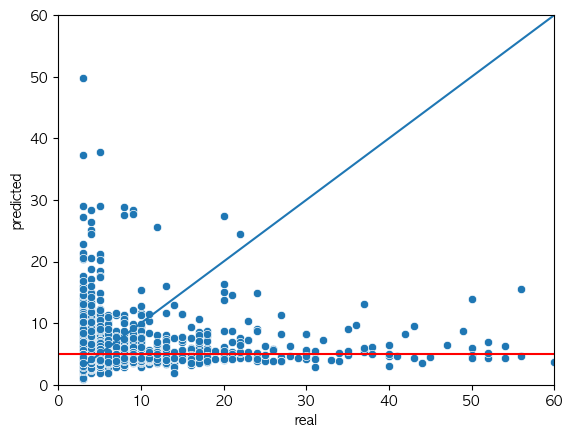

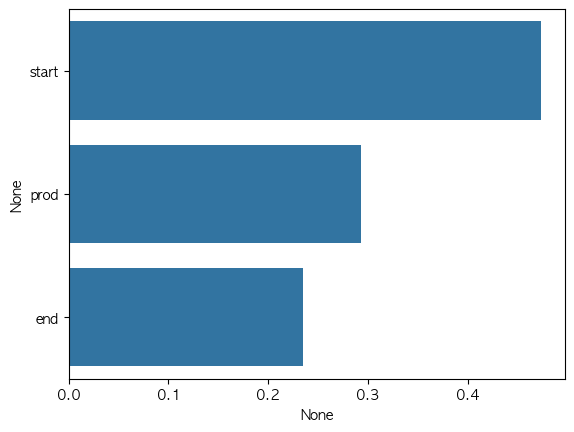

In [36]:
xgb_r = xgb.XGBRegressor()
model_check(xgb_r)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 25347, number of used features: 3
[LightGBM] [Info] Start training from score 4.867164
0.24666158040393737
0.1706237590791322
mae
2.1783347977737098
5.913973407381131
rmse
2.3401226961626094
5.9393089970242325
Result Data Frame
       real  predicted      diff
11780     3   3.632702 -0.632702
1231      4   3.946626  0.053374
28633     3   4.234305 -1.234305
13545     3   4.700030 -1.700030
8523     10   6.174723  3.825277
...     ...        ...       ...
18135     3   4.938736 -1.938736
283       3   4.534527 -1.534527
14668     7   4.635266  2.364734
22168     3   3.670927 -0.670927
9292      3   7.479565 -4.479565

[6337 rows x 3 columns]


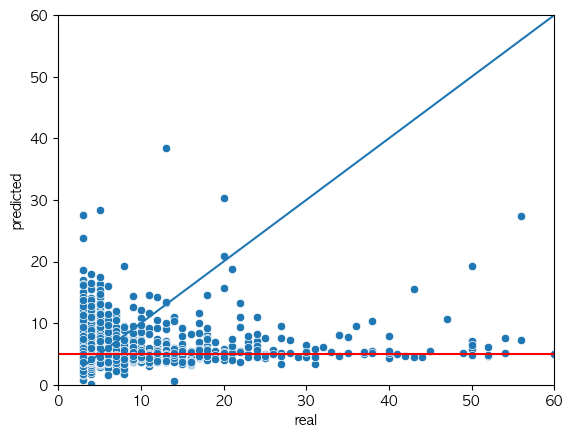

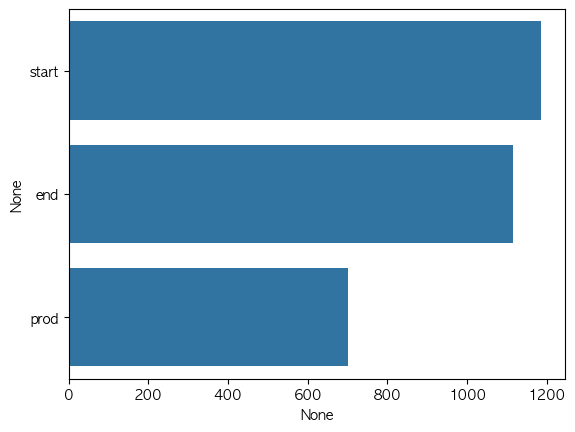

In [37]:
lgb_r = lgb.LGBMRegressor()
model_check(lgb_r)

0.004661087412047182
0.002275981852745801
mae
2.400145065885215
6.797822189629228
rmse
2.4482635894804523
6.514263758571743
Result Data Frame
       real  predicted      diff
11780     3   4.479360 -1.479360
1231      4   4.892451 -0.892451
28633     3   6.113915 -3.113915
13545     3   4.572548 -1.572548
8523     10   5.121627  4.878373
...     ...        ...       ...
18135     3   4.911111 -1.911111
283       3   4.571275 -1.571275
14668     7   4.525591  2.474409
22168     3   4.838584 -1.838584
9292      3   4.883585 -1.883585

[6337 rows x 3 columns]


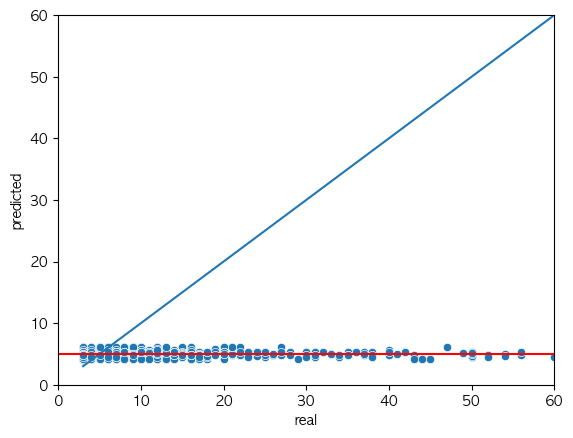

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [38]:
lr = LinearRegression()
model_check(lr)

In [39]:
import tensorflow as tf

2024-03-11 23:09:35.015576: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
y_train

22161    3
5136     3
25934    3
2796     4
11875    5
        ..
14926    3
17615    8
18270    3
21953    3
4989     3
Name: cnt, Length: 25347, dtype: int64

In [48]:
y_test

31125     3
12147    10
21568     3
11181     3
23387     5
         ..
21559     4
16601     4
908       3
20024     3
30750     7
Name: cnt, Length: 6337, dtype: int64

-0.049661374232818245
-0.07316521404238752
mae
1.9179864960234856
7.23792246823143
rmse
1.7660581907905217
5.538736204222132
Result Data Frame
       real  predicted      diff
31125     3   3.100258 -0.100258
12147    10   3.099767  6.900233
21568     3   3.101286 -0.101286
11181     3   3.888962 -0.888962
23387     5   3.888143  1.111857
...     ...        ...       ...
21559     4   3.101424  0.898576
16601     4   3.100038  0.899962
908       3   3.102945 -0.102945
20024     3   3.101434 -0.101434
30750     7   3.100613  3.899387

[6337 rows x 3 columns]


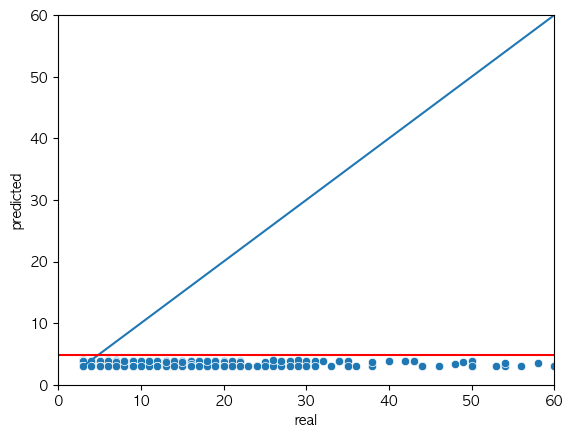

AttributeError: 'SVR' object has no attribute 'feature_importances_'

In [49]:
from sklearn.svm import SVR

svr = SVR()
model_check(svr)

In [199]:
df.shape

(31684, 5)

In [206]:
df

,index,start,end,prod,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3
...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6
31682,31682,4127300065073100,5011000264061200,지갑,7


In [300]:
import tensorflow as tf
from sklearn.metrics import r2_score



# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=x_train.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# 모델 컴파일
model.compile(loss='mean_absolute_error', optimizer='adam')  

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))  

# 모델 예측
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))



Epoch 1/10
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 59614150262784.0000 - val_loss: 5867014979584.0000
Epoch 2/10
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - loss: 5750917693440.0000 - val_loss: 11834552745984.0000
Epoch 3/10
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - loss: 6246949715968.0000 - val_loss: 7036990914560.0000
Epoch 4/10
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - loss: 4987977990144.0000 - val_loss: 1946814513152.0000
Epoch 5/10
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5304209637376.0000 - val_loss: 3130488258560.0000
Epoch 6/10
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3721699000320.0000 - val_loss: 7643315306496.0000
Epoch 7/10
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - loss: 4642054864896.0000 - val_loss: 4018448367616.0000
Epoch 8/10
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3170639544320.0000 - val_loss: 1438466048000.0000
Epoch 9/10
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - loss: 4157255712768.0000 - val_loss: 6134388228096.000

In [158]:
# param_grid = {
#     'n_estimators' : [200,400,600,800],
#     'max_depth' : [2,4,6,8,10]
# }

# grid = GridSearchCV(rfr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# grid.fit(x_train, y_train)

# print(grid.best_score_)
# print(grid.best_params_)
# print(grid.best_estimator_)


-41.063195933094015
{'max_depth': 6, 'n_estimators': 400}
RandomForestRegressor(max_depth=6, n_estimators=400)


In [77]:
# param_grid = {
#     'n_estimators' : [200,400,600,800],
#     'max_depth' : [2,4,6,8,10],
#     'learning_rate' : [0.01, 0.02, 0.1, 0.2, 0.3]
# }

# grid = GridSearchCV(xgb_r, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# grid.fit(x_train, y_train)

# print(grid.best_score_)
# print(grid.best_params_)
# print(grid.best_estimator_)

-42.39415245014253
{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [ ]:
# param_grid = {
#     'n_estimators' : [200,400,600,800],
#     'max_depth' : [2,4,6,8,10],
#     'learning_rate' : [0.01, 0.02, 0.1, 0.2, 0.3]
# }

# grid = GridSearchCV(lgb_r, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# grid.fit(x_train, y_train)

# print(grid.best_score_)
# print(grid.best_params_)
# print(grid.best_estimator_)

In [40]:
import statsmodels.api as sm

# 상수항 추가: OLS 모델에는 상수항(intercept)을 수동으로 추가해야 합니다.
# sm.add_constant 함수를 사용하여 x_train에 상수항을 추가합니다.
x_train_const = sm.add_constant(x_train)

# OLS 모델 생성 및 학습
model = sm.OLS(y_train, x_train_const).fit()

# 요약 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                      -0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    -46.80
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               1.00
Time:                        23:09:42   Log-Likelihood:                -84652.
No. Observations:               25347   AIC:                         1.693e+05
Df Residuals:                   25344   BIC:                         1.693e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.255e-05   4.87e-06      4.633      0.0

In [35]:
# import shap
# explainer = shap.Explainer(xgb_r, x_train)
# shap_values = explainer(x_train)

NameError: name 'xgb_r' is not defined

In [1]:
import shap

# explainer = shap.Explainer(xgb_r, x_test)
# shap_values = explainer(x_test)

shap.summary_plot(shap_values)
plt.show()

shap.plots.waterfall(shap_values[0])
plt.show()

shap.plots.scatter(shap_values)
plt.show()

shap.plots.bar(shap_values)
plt.show()

shap.dependence_plot('start', shap_values.values, x_test)
plt.show()

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values, x_test)


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


NameError: name 'shap_values' is not defined